<h1 align=center> Homework 4 - Maximum Likelihood and Maximum a Posteriori
Estimation </h1>
<br>
$$
\textbf{Team G} \\
\text{Evangelou Sotiris 2159}\\
\text{Kalais Konstantinos 2146}\\
\text{Chatziefremidis Leuteris 2209}\\
$$

## a,b) Parameters and Likelihood Function

  Say we performed $N$ coin tosses and obtained a sequence of heads and tails

$$
\mathbf{x} = \{1,0,1,1,0,1,1,0...\}
$$

- Each of the coin tosses can be thought of as a realization of a random variable

- Probability of the data $\mathbf{x}$ is :
$$
p(\mathbf{x}|\theta) = \prod_{i=1}^N p(X = x_i|\theta) = \prod_{i=1}^N \theta^{x_i}(1-\theta)^{1-x_i}
$$

- Plugging in different $\theta$s give different probability of the data .

- $p(\mathbf{x}|\theta)$ can be seen as a function of **parameter** $\theta$, called *likelihood* 

$$
\mathcal{L(\theta|\mathbf{x})} = p(\mathbf{x}|\theta)
$$

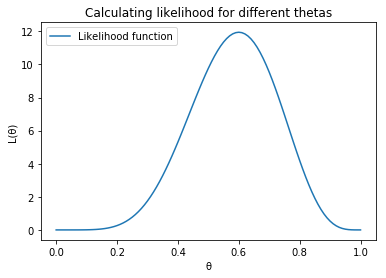

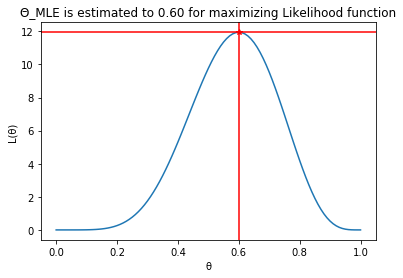

In [2]:
#Libaries we use
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.special import beta

def likelihood(theta,xs):
    product = 1.0
    
    for x in xs:
        product *= theta**x * (1-theta)**(1-x)
    
    return(product)

def create_results(theta,dataset):
    results=[]
    for theta_i in theta:
        results.append(likelihood(theta_i,dataset))
        
    return(results)

#create data input
def create_data(ones_num,zeros_num):
    ones = np.ones(ones_num)
    zeros = np.zeros(zeros_num)
    data = np.r_[ones,zeros]
    data = random.sample(list(data),len(data))

    return np.array(data)

def plot(theta,results,best_theta,best_theta_index,flag):
    a = pow(10,4)
    plt.plot(theta,results*a)
    plt.xlabel('θ')
    plt.ylabel('L(θ)')
    
    if flag==1:
        plt.title("Θ_MLE is estimated to %.2f for maximizing Likelihood function" %best_theta)
        plt.plot(best_theta,(results*a)[best_theta_index],'*',c='red')
        plt.axvline(best_theta, color='red')
        plt.axhline(max(results*a), color='red')
    elif flag==2:
        plt.title("Calculating likelihood for different thetas")
        plt.legend(['Likelihood function'])
    elif flag==3:
        plt.title("Θ_MLE is estimated to %.2f for maximizing f(θ)=L(θ)*P(θ)" %best_theta)
        plt.plot(best_theta,(results*a)[best_theta_index],'*',c='red')
        plt.axvline(best_theta, color='red')
        plt.axhline(max(results*a), color='red')
    elif flag==4:
        plt.title("Calculating f(θ)=L(θ)*P(θ) for different thetas")
        plt.legend(['f(θ)=L(θ)*P(θ)'])
        
    plt.show()
        
def p_theta(theta):
    return( (theta**2)*((1-theta)**2)/beta(3,3) )     


#create the input data
dataset=create_data(ones_num=6,zeros_num=4)

theta=np.arange(0,1.01,0.01)

#create results of L=L(θ|Data) for various theta
results=np.array(create_results(theta,dataset))

plot(theta,results,0,0,2)

#Value of θ that maximizes the likelihood
best_theta_index=np.argmax(results)
best_theta=theta[best_theta_index]

plot(theta,results,best_theta,best_theta_index,1)

## c) Closed-form formula for MLE

- Log-Likelihood: 
$$
\log \mathcal{L}(\theta|\mathbf{x}) = \log p(\mathbf{x}|\theta) = \log \prod_i p(x_i|\theta) = \sum_i \log p(x_i|\theta) = \sum_i \log \theta^{x_i} (1-\theta)^{1 - x_i} = \sum_i \left[{x_i}\log \theta + (1-x_i)\log(1-\theta)\right]
$$

- Our Data: $$
\mathbf{x} = \{0,1,0,0,1,0,1,0,1,...\}
$$

- Maximum likelihood estimate: $$\theta^{\textrm{MLE}} = \mathop{\textrm{argmax}}_\theta \log \mathcal{L}(\theta|\mathbf{x})$$

- To find best $\theta$ we equate the derivative $\frac{\partial}{\partial \theta}\log \mathcal{L}(\theta|\mathbf{x})$ to zero  and solve

$$
\frac{\partial}{\partial \theta}\log \mathcal{L}(\theta|\mathbf{x}) = 0 => \\ \\ 
\sum_i \left[{x_i}\frac{1}{\theta} + (1-x_i)(-\frac{1}{1 - \theta})\right] = 0 => \sum_i {x_i}\frac{1}{\theta} - \sum_i (1-x_i)\frac{1}{1 - \theta} = 0 => 
\sum_i {x_i}\frac{1}{\theta} = \sum_i (1-x_i)\frac{1}{1 - \theta} => \\
\frac{1}{\theta}\underbrace{\sum_i {x_i}}_{a} = \frac{1}{1 - \theta}\underbrace{\sum_i (1-x_i)}_{b} => \\ \\
(1 - \theta)a = \theta b => a  = \theta (a + b) => \theta = \frac{a}{a + b} \\ \\
$$
- So : $$
\theta^{MLE} = \frac{
\overbrace{ \sum_i [x_i = 1] }^{ \textrm{count of 1s in data} } }{ \underbrace{
 \sum_i [x_i = 1]
 }_{\textrm{count of 1s in data} } + 
 \underbrace{
  \sum_i [x_i = 0]
 }_{\textrm{count of 0s in data}}}
$$

In [3]:
a=np.sum(dataset)
b=np.sum(1-dataset)
theta_closed_form = a/(a+b)
print("Closed form of theta: %.2f \n" %theta_closed_form)

Closed form of theta: 0.60 



## d) Likelihood plots for n=5, 10, 100

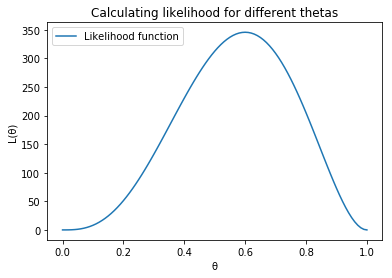

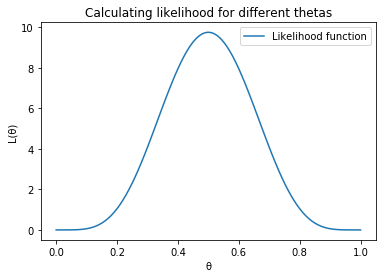

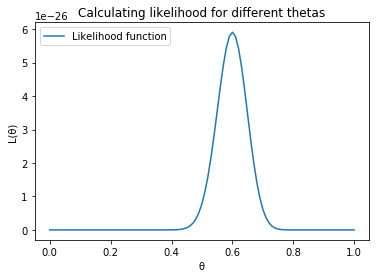

In [4]:
dataset=create_data(ones_num=3,zeros_num=2)
results=np.array(create_results(theta,dataset))
plot(theta,results,0,0,2)

dataset=create_data(ones_num=5,zeros_num=5)
results=np.array(create_results(theta,dataset))
plot(theta,results,0,0,2)

dataset=create_data(ones_num=60,zeros_num=40)
results=np.array(create_results(theta,dataset))
plot(theta,results,0,0,2)

## e) Likelihood functions and maximum likelihood estimates for different data sets

**As n->oo** =>
- Maximum Likelihood Estimates ->0 (generally, it descends) 
- σ(Standard deviation) descends, since : $$ D(\text{θ}) = \{\text{θ}/L(\text{θ}) \neq 0\} = 6σ $$

## f) Maximum a Posteriori Probability Estimation

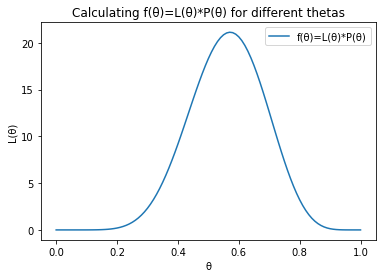

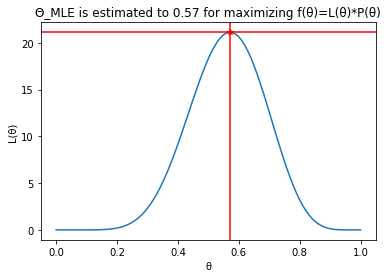

In [5]:
#create the input data
dataset = create_data(ones_num=6,zeros_num=4)

#create results of f=L(θ)*P(θ) for various theta
L_theta = np.array(create_results(theta,dataset))
P_theta = p_theta(theta)
f_theta = L_theta * P_theta
plot(theta,f_theta,0,0,4)

#Value of θ that maximizes f(θ)
best_theta_index=np.argmax(f_theta)
best_theta=theta[best_theta_index]

plot(theta,f_theta,best_theta,best_theta_index,3)

## g) Closed form formula for the MAP estimate

$$
θ_{MAP}\text{ = arg}_{θ}\text{max}{L(θ)p(θ)}\text{ = arg}_{θ}\text{max[}\log\text{(L(θ)p(θ))] = arg}_{θ}\text{max[}\log
\text{f(θ)]}
$$
<br>
$$
\text{f(θ) = L(θ)p(θ) = L(θ)}\frac{\theta^{2}(1-\theta)^{2}}{B(3,3)} =>
$$
<br>
$$
\text{logf(θ) = logL(θ) + log}\frac{1}{Β(3,3)}\text{ + 2log(1-θ) + 2logθ} =>
$$
<br>
$$
\frac{\partial logf(θ)}{\partial θ}\text{ = 0 => }\frac{\partial logL(θ)}{\partial θ}\text{ + }\frac{2}{θ}\text{ - }\frac{2}{1- θ}\text{ = 0}
$$
<br>
*From c) we get* :
<br>
$$
\frac{1}{\theta}\underbrace{\sum_i {x_i}}_{a} - \frac{1}{1 - \theta}\underbrace{\sum_i (1-x_i)}_{b} +
\frac{2}{θ} - \frac{2}{1 - θ} = 0 =>
$$
<br>
$$
\frac{a}{θ} - \frac{b}{1 - θ} + \frac{2}{θ} - \frac{2}{1 - θ} = 0 =>
$$
<br>
$$
a(1 - θ) - bθ + 2(1 - θ) -2θ = 0 =>
$$
<br>
$$
(a + 2)(1 - θ) + (-b -2)θ = 0 =>
$$
<br>
$$
(a + 2) - (a + 2)θ + (-b - 2)θ = 0 =>
$$
<br>
$$
a + 2 = (a + 2 + 2 + b)θ =>
$$
<br>
$$
θ = \frac{a + 2}{a - b + 4}
$$

In [6]:
a=np.sum(dataset)
b=np.sum(1-dataset)
theta_closed_form = (a+2)/(a+b+4)
print("Closed form of theta: %.2f \n" %theta_closed_form)

Closed form of theta: 0.57 



## h) MAP VS MLE
<br>
<br>
$
\bullet\text{   } θ_{MAP}\text{=arg}_{θ}\text{max[}\log \text{L(θ) + }\log \text{P(θ)]} \text{( = 0.57 for (c) )}
$
<br>
<br>
$
\bullet\text{   } θ_{MLE}\text{=arg}_{θ}\text{max}\log \text{L(θ)}\text{( = 0.6 for (c) )}
$
<br>
<br>
$
=> θ_{MAP} - θ_{MLE} = \text{arg}_{θ}\text{max}\log \text{P(θ)}\text{( =0.03 for (c) ), since for 0}\leq\text{θ}\leq\text{1 =>  0}\leq\text{P(θ)}\leq\text{1 => logP(θ)}\leq\text{0}
$
<br>
<br>
$
\bullet\text{ So, the prior distribution P(θ) acts as a regularizer in MAP estimation,the likelihood is now weighted with some weight coming}
$
$
\text{from the prior and prevents overfitting.}
$

## i) Relationship between the MAP and MLE estimates as n goes to infinity.

$
\text{Comparing both MLE and MAP equation, the only thing that differs is the inclusion of prior P(θ) in MAP, otherwise they are identical.} \\
\text{What it means is that, the likelihood is now weighted with some weight coming from the prior.If the prior beliefs are strong then the} \\
\text{observed data have relatively little impact on the parameter estimates,while if the prior beliefs are weak, then the outcome is more }\\
\text{like standard MLE.} \\
$
<h3>
<strong>
    $\bullet$ This leads to the fact that for an infinite amount of data, MAP gives the same result as MLE.
</strong>
</h3>